In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
from pandas_profiling import ProfileReport

In [3]:
profile = ProfileReport(data, title='Pandas Profiling Report')

In [4]:
profile

## Experiment 1

In [5]:
from pycaret.regression import *

In [6]:
s = setup(data, target = 'charges', session_id = 123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9659,33302027.1824,5770.7909,0.8011,0.4683,0.4153
1,4503.7366,43746480.7428,6614.1122,0.7456,0.5633,0.4217
2,3880.5528,31795139.4170,5638.7179,0.5974,0.7645,0.4396
3,3747.6457,26805298.3432,5177.3833,0.7762,0.5015,0.5175
4,4471.0419,43410532.5882,6588.6670,0.6771,0.5224,0.3767
5,4182.7551,36166332.0827,6013.8450,0.7674,0.7416,0.4320
6,4081.1022,39192588.2370,6260.3984,0.7333,0.6434,0.4241
7,4928.1534,46415035.8381,6812.8581,0.7448,0.5887,0.4137
8,4609.3147,40370354.9653,6353.7670,0.7392,0.5686,0.5111
9,4665.8647,42596794.8671,6526.6220,0.7256,0.8131,0.4802


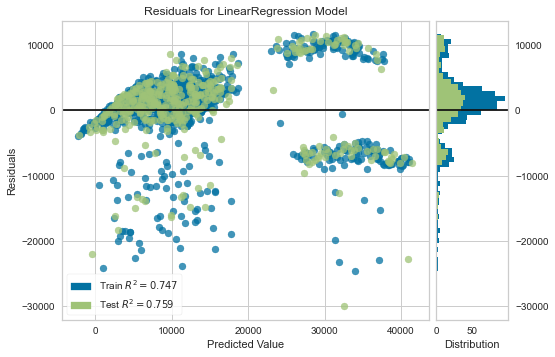

In [8]:
plot_model(lr)

## Experiment 2

In [9]:
s2 = setup(data, target='charges', session_id=123, normalize=True, polynomial_features=True, 
           trigonometry_features=True, feature_interaction=True, bin_numeric_features= ['age', 'bmi']
          )

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
s2[0].columns

Index(['bmi_Power2', 'age_Power2', 'sex_female', 'sex_male', 'children_0',
       'children_1', 'children_2', 'children_3', 'children_4', 'children_5',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'age_0.0', 'age_1.0',
       'age_10.0', 'age_11.0', 'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0',
       'age_6.0', 'age_7.0', 'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0',
       'bmi_10.0', 'bmi_11.0', 'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0',
       'bmi_6.0', 'bmi_7.0', 'bmi_8.0', 'bmi_9.0',
       'smoker_yes_multiply_children_1', 'bmi_7.0_multiply_smoker_yes',
       'smoker_yes_multiply_age_Power2', 'sex_male_multiply_bmi_Power2',
       'children_2_multiply_age_Power2', 'age_Power2_multiply_smoker_no',
       'age_Power2_multiply_smoker_yes', 'smoker_yes_multiply_sex_female',
       'region_southeast_multiply_smoker_yes', 'sex_male_multiply_age_Power2',
       'smoker_yes_multiply_children_2', 'age_Power2_multi

In [11]:
s2[0].shape

(1338, 65)

In [12]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2809.6406,19992948.0819,4471.3475,0.8806,0.3883,0.3038
1,3619.0947,35272224.1869,5939.0424,0.7949,0.4614,0.3531
2,2876.3585,21993676.7182,4689.7416,0.7215,0.5248,0.3706
3,3078.7577,24144912.5151,4913.7473,0.7984,0.5467,0.4322
4,3187.4673,27945043.1312,5286.3071,0.7922,0.4446,0.2803
5,3203.2439,23081298.6818,4804.3000,0.8515,0.3670,0.2839
6,2899.9271,24471706.6006,4946.8886,0.8335,0.3947,0.3293
7,3276.4629,28276971.6133,5317.6096,0.8445,0.4705,0.3105
8,3068.1253,21861177.8873,4675.5939,0.8588,0.3947,0.3440
9,3144.0713,28676160.3131,5355.0126,0.8153,0.4920,0.3372


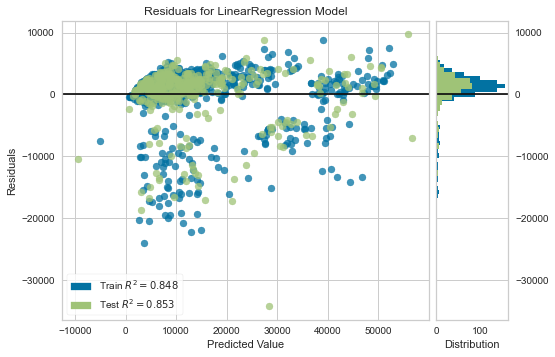

In [13]:
plot_model(lr)

In [ ]:
save_model(lr, 'deployment_19102020')

In [ ]:
deployment_19102020 = load_model('deployment_19102020')

In [ ]:
deployment_19102020

In [ ]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url, json={'age':30, 'sex':'male', 'bmi':39, 'children':1, 'smoker':'no', 'region':'southwest'})
print(pred.json())